**PERSONS INVOLVED IN THE GROUP:** ### TO DO ###

**Before starting:**

You need to install Basemap. You have to do it at each new session.

In [1]:
from google.colab import drive
drive.mount('/content/drive')




Mounted at /content/drive


In [2]:
%%bash
apt-get install libgeos-3* libgeos-dev
pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists...
Building dependency tree...
Reading state information...
libgeos-3.6.2 is already the newest version (3.6.2-1build2).
libgeos-3.6.2 set to manually installed.
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 14 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 0s (163 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 144793 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1build2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
  Created wheel for basemap: filename=basemap-1.2.1-cp36-cp36m-linux_x86_64.whl size=1217561

**Goal of this practice:**

The goal is to use a cloud computing platform (the Google Cloud Platform). We will use big data tools on Colab to process large datasets. These data are real satellite observations of the ocean (5 years).

**Evaluation of this practice:**

I will evaluate 3 main components.

The first is the quality of the code. It must be concise and well written. The goal is to manipulate big data tools provided by the Google Cloud Platform (such as BigQuery).

The second is the quality of the outputs. Never forget that you are dealing with physical variables evolving in space and time. You must use maps and time series. You must also write the units (e.g., °C, m).

The third thing is the discussion about your results. Again, remember that you are dealing with oceanographic data. They have a physical meaning and you should be able to comment the outputs.

**Import libraries:**

- matplotlib (2D plotting)
- pylab (scientific computing)
- basemap (plotting 2D data on maps)
- scikit-learn (machine learning)
- pandas (data structures and data analysis tools)

In [3]:
%matplotlib inline
%pylab inline
from mpl_toolkits.basemap import Basemap
import sklearn
import pandas as pd
from scipy.stats.mstats import zscore
import warnings
warnings.filterwarnings("ignore") # disable warnings
pylab.rcParams['figure.figsize']=(20,20) # graph size

Populating the interactive namespace from numpy and matplotlib


**Declare functions:**
- plot_im (plot satellite image with geographic coordinates)
- plot_ts (plot time series)

In [5]:
# function to plot images  
def plot_im(lon,lat,im,size_points,var_name):
    
    # transform to arrays (just in case)
    lon=array(lon)
    lat=array(lat)
    im=array(im)
    
    if max(lon)-min(lon)<100:
      # Mercator projection (for small zone)
      m=Basemap(projection='merc',llcrnrlat=nanmin(lat),urcrnrlat=nanmax(lat),\
                llcrnrlon=nanmin(lon),urcrnrlon=nanmax(lon),lat_0=(nanmax(lat)+nanmin(lat))*0.5,\
                lon_0=(nanmax(lon)+nanmin(lon))*0.5,resolution='l')
    else:
      # Orthogonal projection (for large zone)
      m=Basemap(projection='ortho',lat_0=0,lon_0=0,resolution='l')
    # you can use other projections (see https://matplotlib.org/basemap/users/mapsetup.html)
    
    # transform (lon,lat) to (x,y)
    x,y=m(lon,lat)

    # plot
    im=ma.masked_where(isnan(im),im)
    res=m.scatter(x,y,size_points,im,'o',alpha=1,cmap='jet',lw=0)
    m.drawcoastlines()
    m.fillcontinents()
    parallels = linspace(nanmin(lat),nanmax(lat),15)
    meridians = linspace(nanmin(lon),nanmax(lon),15)
    #m.drawparallels(parallels,labels=[1,0,0,1],fontsize=10)
    #m.drawmeridians(meridians,labels=[1,0,0,1],fontsize=10)
    cb=m.colorbar(res,location="right")
    cb.set_label(var_name,fontsize=15)
    
# function to plot time series
def plot_ts(time,SST,line_type,var_name):

    # plot
    plot_date(time,SST,line_type)
    xlabel('Time',fontsize=15)
    ylabel(var_name,fontsize=15)

**The satellite database:**

In this practice, we use 5 years (2011-2015) of satellite observations of the global ocean. We use daily data with 25km spatial resolution. We study the Sea Surface Temperature (SST, in degrees) and the Sea Surface Height (SSH, in meters). SST and SSH are indexed in space (lon, lat) and time. The full database is stored in csv files and is quite large (~50Go).

**Part 1) Manipulation of a small dataset using pandas:**

We start to work on a small database (only the 10 first days in 2015, ~250Mo) and we will perform some basic statistics. The idea is to show that even if you use a small sample, basic data manipulation without big data tools is difficult, time and resource consuming.

After copying the dataset "data_sst_ssh_2015_small.csv" on your Colab environment, we read it using pandas (easy-to-use data structures and data analysis tools). We use the *groupby* and *mean* pandas functions to: map the global SST and SSH (using *plot_im*), plot the mean SST and SSH time series (using *plot_ts*).

In [6]:
# read dataframe
data = pd.read_csv('/content/drive/MyDrive/data_sst_ssh_2015_small.csv', header=None, names=['lat', 'lon', 'sst', 'time', 'ssh'])

In [ ]:
# sample of the dataset
data

,lat,lon,sst,time,ssh
0,-77.625,322.625,-1.8,735600.0,-1.2535
1,-77.375,319.625,-1.8,735600.0,-1.2179
2,-77.375,319.875,-1.8,735600.0,-1.2214
3,-77.375,320.125,-1.8,735600.0,-1.2247
4,-77.375,320.375,-1.8,735600.0,-1.2285
...,...,...,...,...,...
5338138,81.875,29.375,-1.8,735609.0,-0.3426
5338139,81.875,29.625,-1.8,735609.0,-0.3394
5338140,81.875,29.875,-1.8,735609.0,-0.3377
5338141,81.875,30.125,-1.8,735609.0,-0.3370


In [ ]:
# statistics of the dataset
data.describe()

,lat,lon,sst,time,ssh
count,5.338143e+06,5.338143e+06,5.338143e+06,5.338143e+06,5.338142e+06
mean,-1.140247e+01,1.932643e+02,1.646710e+01,7.356045e+05,3.436659e-01
std,3.845651e+01,1.003294e+02,1.041889e+01,2.871929e+00,7.254869e-01
min,-7.762500e+01,1.250000e-01,-1.800000e+00,7.356000e+05,-1.520300e+00
25%,-4.462500e+01,1.123750e+02,6.450000e+00,7.356020e+05,-3.170000e-02
50%,-1.587500e+01,1.971250e+02,1.950000e+01,7.356050e+05,5.697000e-01
75%,1.737500e+01,2.733750e+02,2.595000e+01,7.356070e+05,8.530000e-01
max,8.437500e+01,3.598750e+02,3.345000e+01,7.356090e+05,1.898000e+00


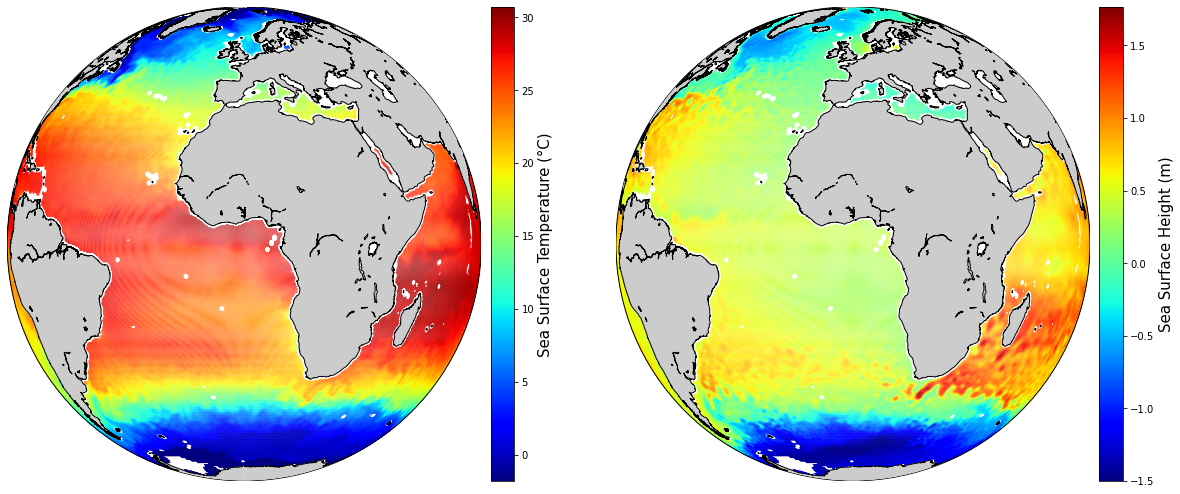

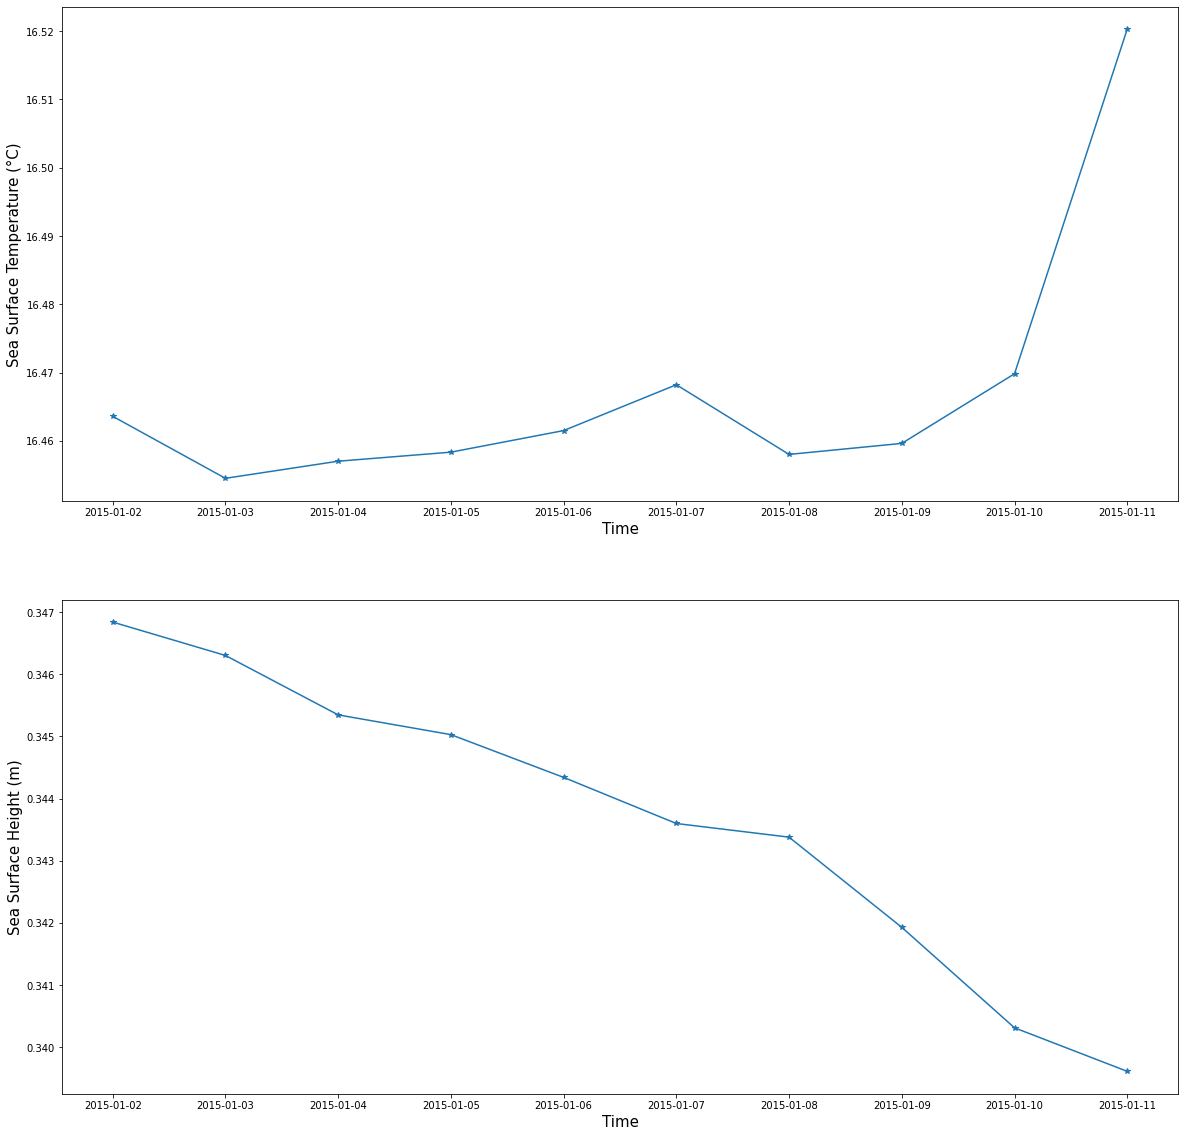

In [ ]:
# plot global SST and SSH maps
sst_im=data.groupby(['lon','lat'])['sst'].mean()
ssh_im=data.groupby(['lon','lat'])['ssh'].mean()
lon_im=data.groupby(['lon','lat'])['lon'].mean()
lat_im=data.groupby(['lon','lat'])['lat'].mean()
figure()
subplot(1,2,1)
plot_im(lon_im,lat_im,sst_im,1,'Sea Surface Temperature (°C)')
subplot(1,2,2)
plot_im(lon_im,lat_im,ssh_im,1,'Sea Surface Height (m)')

# plot global SST and SSH time series
sst_ts=data.groupby(['time'])['sst'].mean()
ssh_ts=data.groupby(['time'])['ssh'].mean()
time_ts=data.groupby(['time'])['time'].mean()
figure()
subplot(2,1,1)
plot_ts(time_ts,sst_ts,'-*','Sea Surface Temperature (°C)')
subplot(2,1,2)
plot_ts(time_ts,ssh_ts,'-*','Sea Surface Height (m)')

Now, we consider only a small region of the Globe: the Mediterranean Sea. As previously, we plot the mean time series and maps of SST and SSH. We also plot the SSH as a function of SST and the 2 distributions using histograms.

Text(0, 0.5, 'Sea Surface Height (m)')

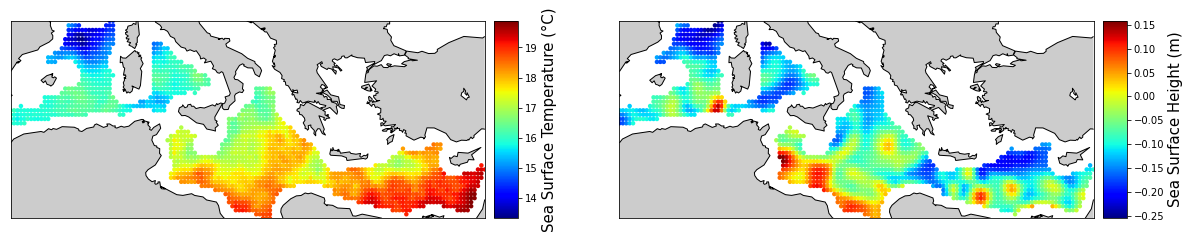

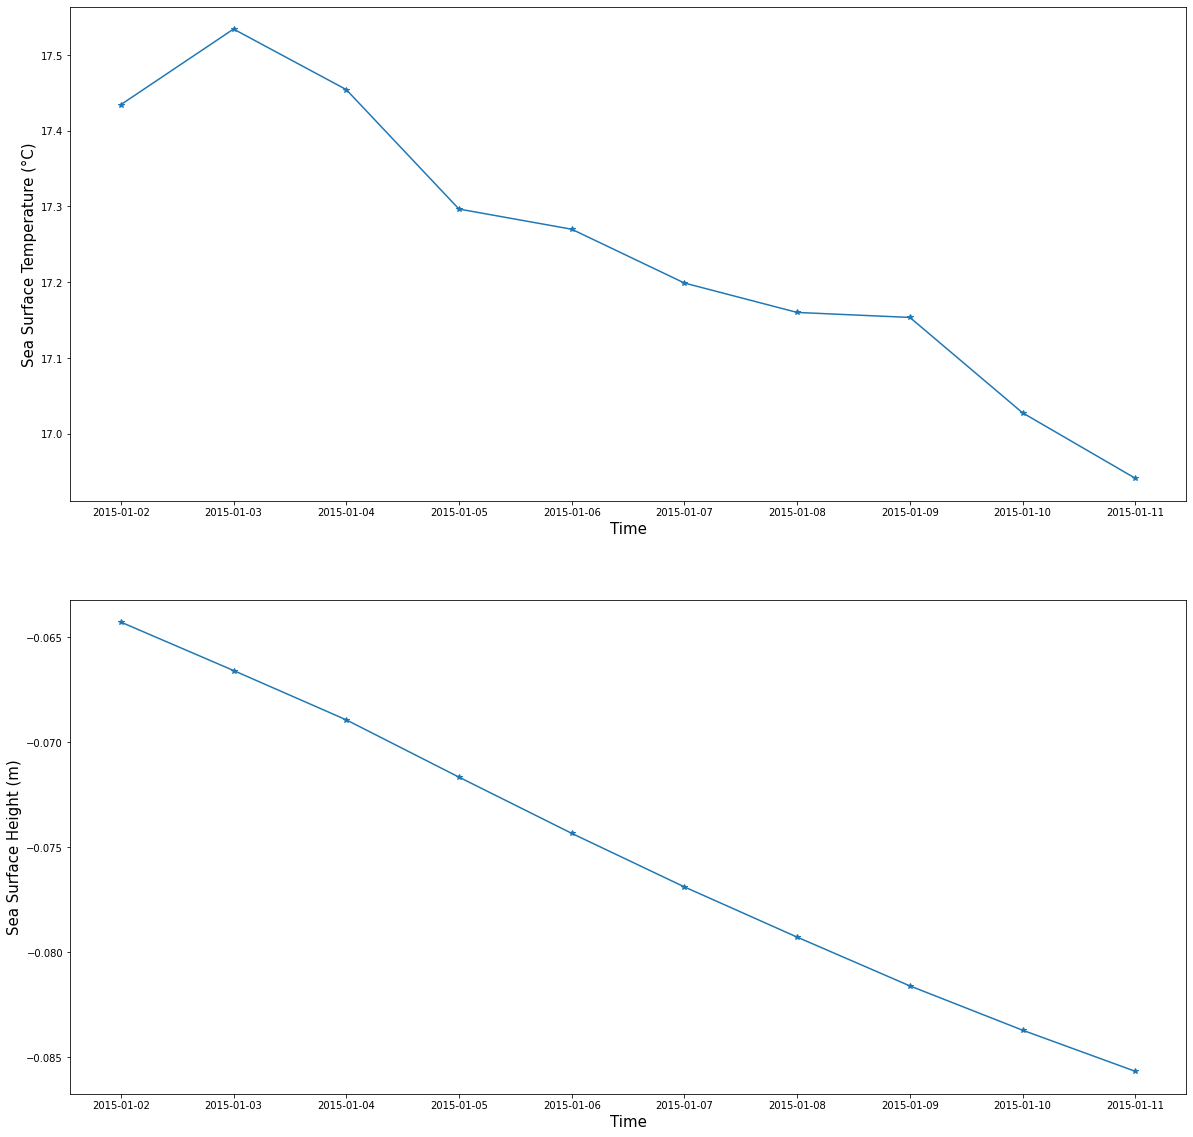

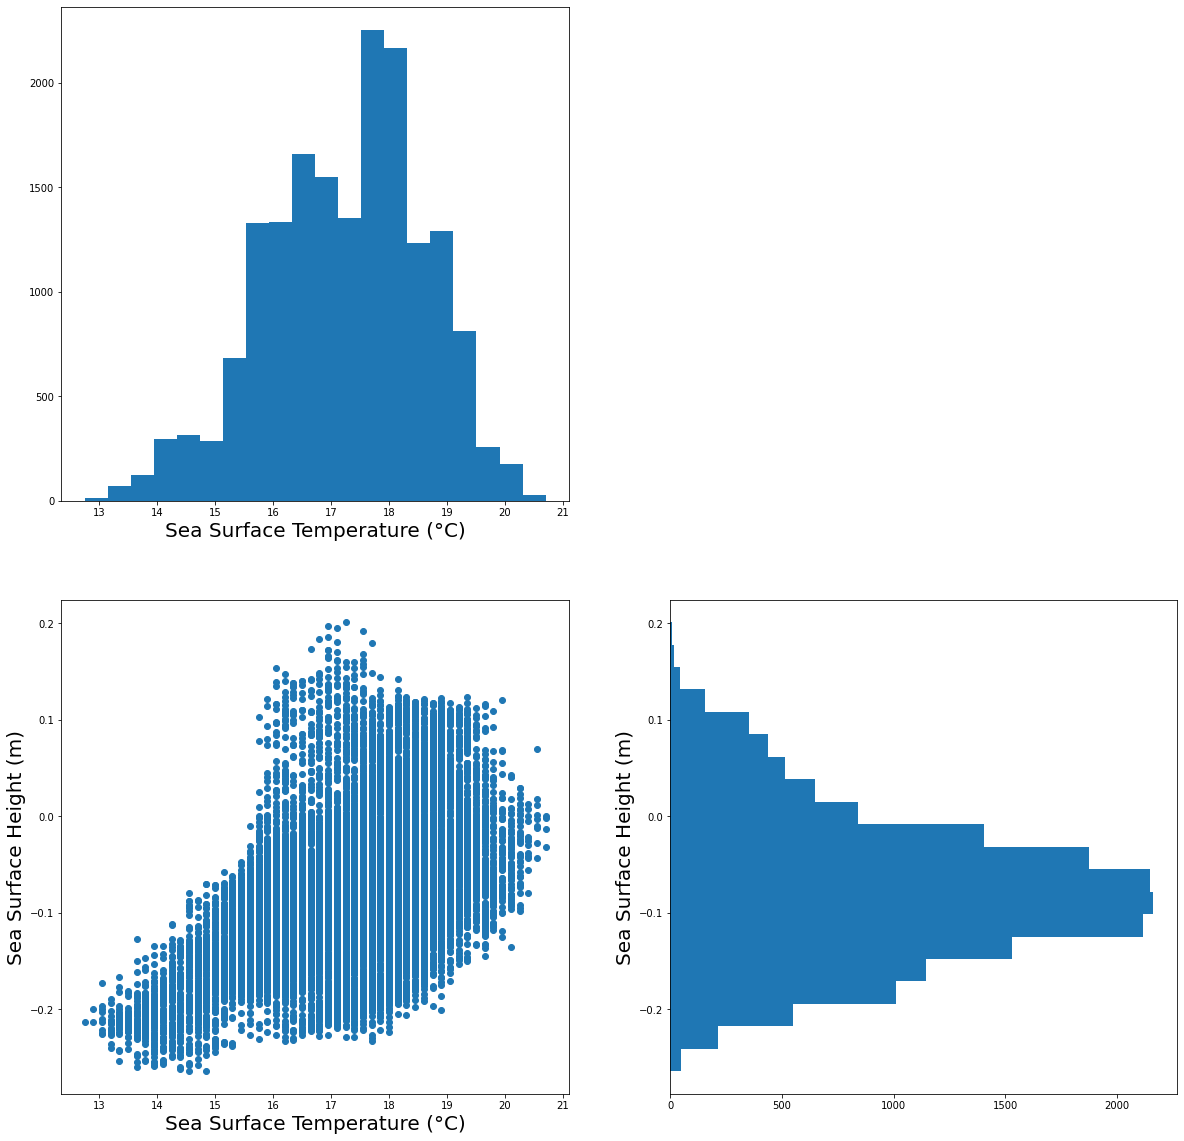

In [ ]:
# data selection
data_med=data[(data.lon>0) & (data.lon<35) & (data.lat>30) & (data.lat<45)]

# plot SST and SSH maps
sst_med_im=data_med.groupby(['lon','lat'])['sst'].mean()
ssh_med_im=data_med.groupby(['lon','lat'])['ssh'].mean()
lon_med_im=data_med.groupby(['lon','lat'])['lon'].mean()
lat_med_im=data_med.groupby(['lon','lat'])['lat'].mean()
figure()
subplot(1,2,1)
plot_im(lon_med_im,lat_med_im,sst_med_im,20,'Sea Surface Temperature (°C)')
subplot(1,2,2)
plot_im(lon_med_im,lat_med_im,ssh_med_im,20,'Sea Surface Height (m)')

# plot SST and SSH time series
sst_med_ts=data_med.groupby(['time'])['sst'].mean()
ssh_med_ts=data_med.groupby(['time'])['ssh'].mean()
time_med_ts=data_med.groupby(['time'])['time'].mean()
figure()
subplot(2,1,1)
plot_ts(time_med_ts,sst_med_ts,'-*','Sea Surface Temperature (°C)')
subplot(2,1,2)
plot_ts(time_med_ts,ssh_med_ts,'-*','Sea Surface Height (m)')

# plot hist(SST), hist(SSH), SSH~SST
figure()
subplot(2,2,1)
hist(data_med.sst, 20)
xlabel('Sea Surface Temperature (°C)', size=20)
subplot(2,2,4)
hist(data_med.ssh, 20, orientation=u'horizontal')
ylabel('Sea Surface Height (m)', size=20)
subplot(2,2,3)
scatter(data_med.sst, data_med.ssh)
xlabel('Sea Surface Temperature (°C)', size=20)
ylabel('Sea Surface Height (m)', size=20)

**Remark:**

The dataset used above is small (250Mo) and corresponds only to 10 days. Now, we want to manipulate the full database of 5 years (50Go) using big data tools. This database is stored in the Google Cloud Platform.

**Part 2) Manipulation of the full database using BigQuery**

First, we have to connect to the Google Cloud Platform. using the following command. You will have to enter the login "bigdataocean2020@gmail.com" and password "bdoimt2020_mce". Do it only once.



In [7]:
from google.colab import auth
auth.authenticate_user()

The Google Cloud Platform has set up a tool to handle large databases. This is called "BigQuery" and it is based on the NoSQL ("Not only SQL") language. The syntax in BigQuery is very similar to the pandas example given in Part 1). For instance, in the example below, we plot the mean SST map in the Mediterranean Sea over the period 2011-2015. The full 5-years dataset is stored in the BigQuery table *bdo2020.bdo2020.2011_2015*. The project is called *alert-ground-261008* (strange but you have to provide it). The result of the BigQuery request is stored in the *output* dataframe. 

In [ ]:
%%bigquery --project alert-ground-261008 output
SELECT lon, lat, AVG(sst) AS mean_sst
FROM bdo2020.bdo2020.2011_2015
WHERE lon>0 AND lon<35 AND lat>30 AND lat<45
GROUP BY lon, lat

In [ ]:
# sample of the dataframe
output

,lon,lat,mean_sst
0,24.375,33.125,21.847590
1,20.125,33.875,21.814321
2,26.375,33.875,21.849315
3,29.875,33.875,21.743100
4,27.875,34.125,21.061364
...,...,...,...
1718,33.375,31.875,23.413965
1719,33.875,32.125,23.498001
1720,17.375,32.125,22.485296
1721,27.875,32.875,22.115553


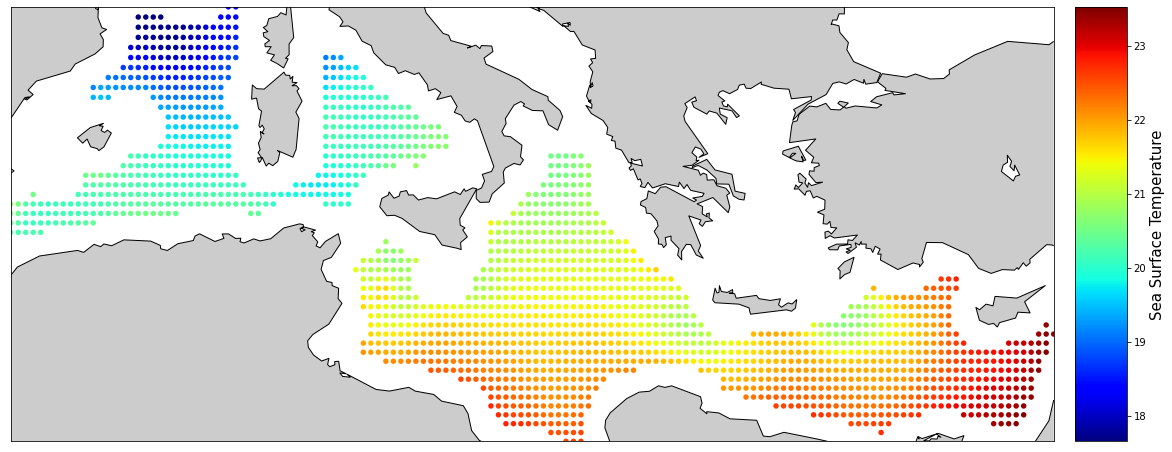

In [ ]:
plot_im(output.lon,output.lat,output.mean_sst,30,'Sea Surface Temperature')

SQL language is suitable to manipulate and compute basic statistics such as the mean, standard deviation, minimum, maximum, correlation, etc... Here you will find the list of basic functions: https://cloud.google.com/bigquery/docs/reference/legacy-sql?hl=fr.

It is also possible to use Machine Learning algorithms inside BigQuery. Here you will find a complete description of the possibilities: https://cloud.google.com/bigquery-ml/docs/bigqueryml-intro?hl=fr. Another solution (easiest way of doing) is to extract a small amount of data in BigQuery and then use scikit-learn: https://scikit-learn.org/stable/.

**Important note:** the tables stored in the Google Cloud Platform are not chronologically ordered. When dealing with time series, you will thus have to use *ORDER BY time* in your BigQuery requests.

**QUESTION 1**: Compute and plot the correlation map over the period 2011-2015 between SST and SSH in the Agulhas current, between longitudes (+15,+70) and latitudes (-50,-30).

In [8]:
### TO DO ###
%%bigquery --project alert-ground-261008 question1
SELECT AVG(sst) AS mean_sst, AVG(ssh) as mean_ssh
FROM bdo2020.bdo2020.2011_2015
WHERE lon>15 AND lon<70 AND lat> -50 AND lat< -30
GROUP BY lon, lat



In [ ]:
question1.corr()

,mean_sst,mean_ssh
mean_sst,1.000000,0.942663
mean_ssh,0.942663,1.000000


**QUESTION 2**: Plot the dealy mean and standard deviation time series of SST for the period 2011-2015 in the Equatorial Pacific, between longitudes (+180,+300) and latitudes (-20,+20). The mean SST time series is called the ENSO index and is used to identify El Nino and La Nina events.

In [9]:
### TO DO ###
%%bigquery --project alert-ground-261008 question2
SELECT time,AVG(sst) AS mean_sst, STDDEV(sst) as std_sst
FROM bdo2020.bdo2020.2011_2015
WHERE lon>180 AND lon<300 AND lat> -20 AND lat< 20
GROUP BY time

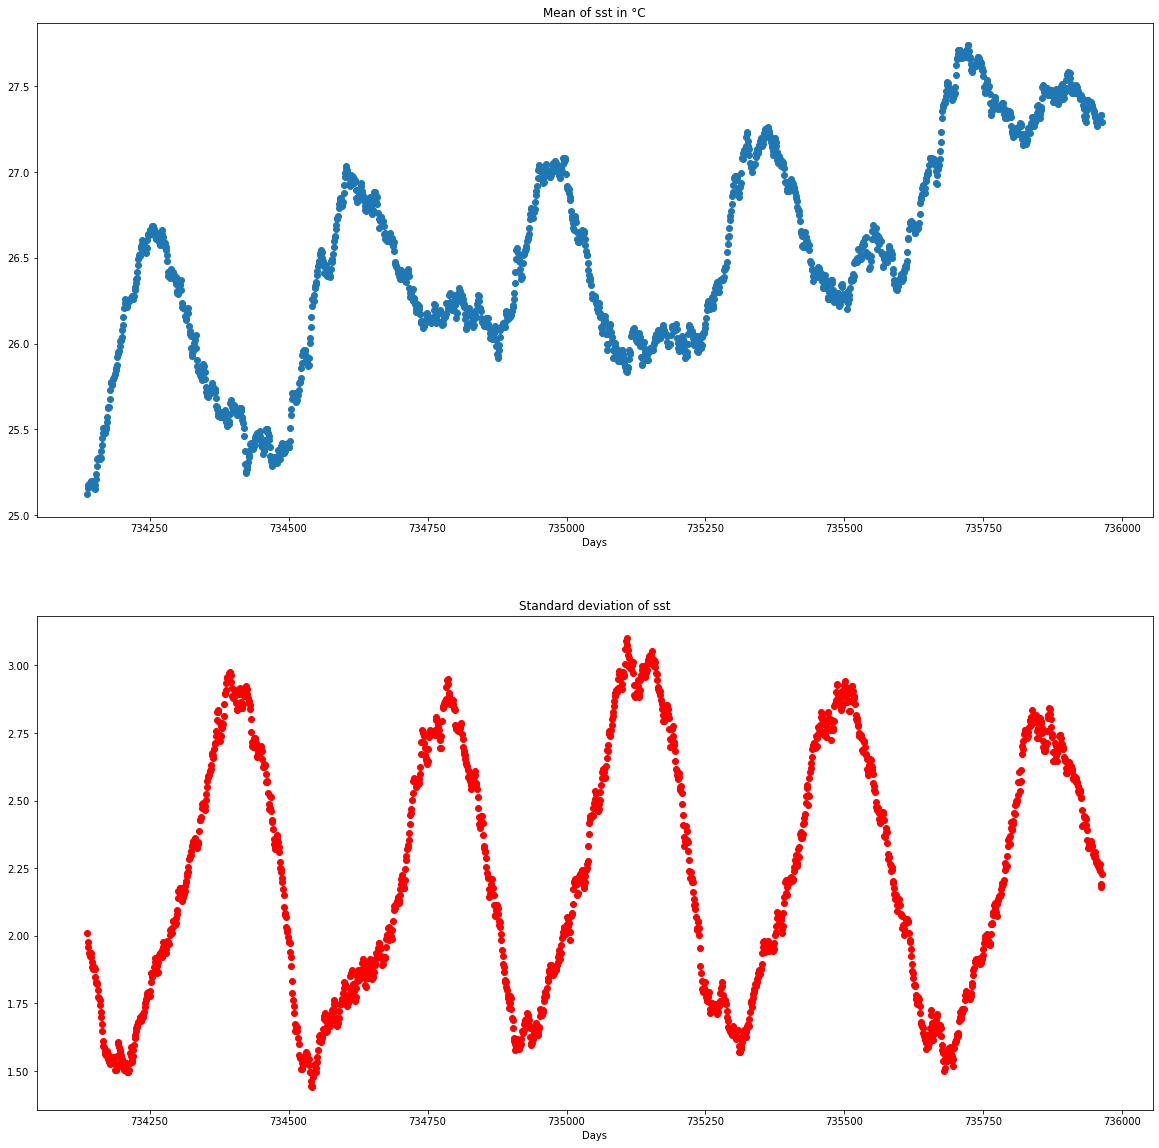

In [13]:
fig, axs = plt.subplots(2)
axs[0].scatter(question2.time,question2.mean_sst,)
axs[1].scatter(question2.time,question2.std_sst,c='red')
axs[0].title.set_text('Mean of sst in °C')
axs[1].title.set_text('Standard deviation of sst')
axs[0].set_xlabel("Days")
axs[1].set_xlabel("Days")
plt.show()

**QUESTION 3**: Compute the dealy time series of SST over the period 2011-2015 in the Gulf of Mexico, between longitudes (+263,+281) and latitudes (+17,+35). In this region, there are a lot of hurricanes and they use the energy of the sea (hot waters) to get stronger. Thus, after a hurricane, we see a rapid decrease of the SST. Plot the time series of the difference of SST between 2 consecutive days and check that the negative peaks (below -0.4°C) correspond to well known hurricanes.


In [14]:
### TO DO ###
%%bigquery --project alert-ground-261008 question3
SELECT time, AVG(sst) as mean_sst
FROM bdo2020.bdo2020.2011_2015
WHERE lon>263 AND lon<281 AND lat> 17 AND lat< 35
GROUP BY time


In [16]:
question3 #Daily sst over the period 2011-2015

,time,mean_sst
0,735233.0,24.852989
1,735225.0,25.280967
2,735183.0,27.141692
3,735211.0,25.781275
4,734981.0,25.175143
...,...,...
1821,735586.0,25.050198
1822,734223.0,24.658879
1823,734336.0,29.511890
1824,734177.0,22.943934


TypeError: ignored

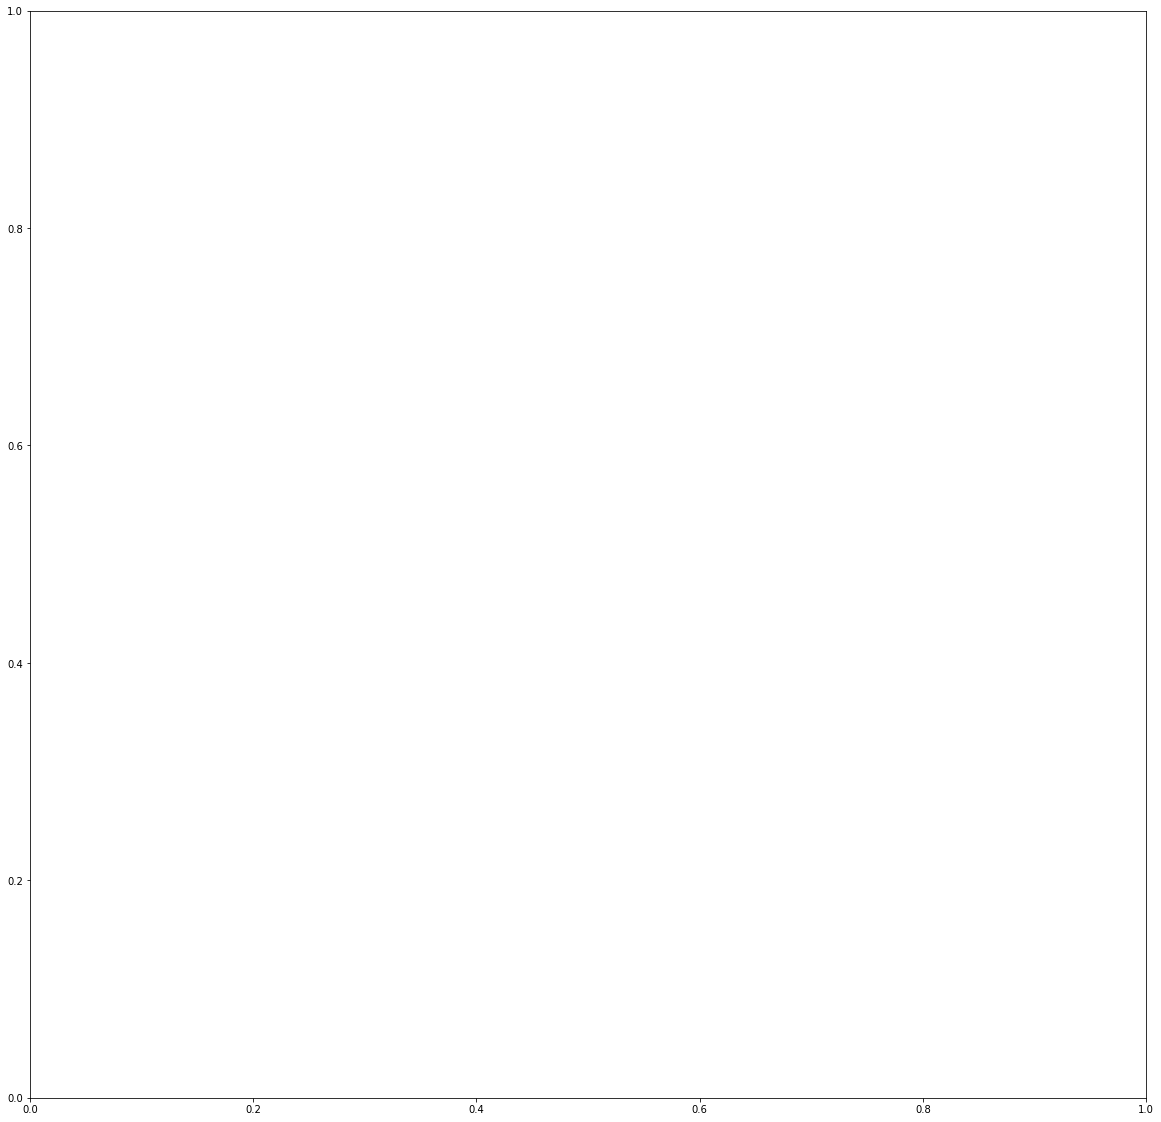

In [20]:
n=len(question3.time)
plt.scatter(question3.time[0:n-1],[question3.mean_sst[i+1]-question3.mean_sst[i] for i in range(n-1)])
plt.plot(question3.time[0:n-1],[-0.4 for i in range(n-1)], c='red', label='Under this line, it means it is a hurricane')
plt.title("Difference of temperature between two consecutive days in °C", c='w', fontsize=20)
plt.xlabel("Days",c='w', fontsize=20)
plt.ylabel("Difference in temperature in °C",c='w', fontsize=20)
plt.legend()
plt.show()

**Part 3) Combination of BigQuery and scikit-learn**

Now, we will extract data using BigQuery and apply regressions (using scikit-learn) on these extracted data. 

Note that there is another way to use machine learning algorithms (like the linear regression) in BigQuery, but this solution is difficult to implement: I suggest to use the classic one (i.e., using scikit-learn).

**QUESTION 4**: Model the daily mean SST in the Mediterranean Sea using a linear tendancy and a one-year seasonal cycle such that: $SST(t)=\alpha_0 + \alpha_1 t + \alpha_2 sin(2\pi\omega t) + \alpha_3 cos(2\pi\omega t)$, with $\omega=\frac{1}{365}$. Then, plot the raw time series and the one produced by the model. Finally, plot the autocorrelation function of the residuals (difference between the raw time series and the estimation made by the model).

In [ ]:
### TO DO ###

%%bigquery --project alert-ground-261008 question4
SELECT time,AVG(sst) AS mean_sst
FROM bdo2020.bdo2020.2011_2015
WHERE lon>0 AND lon<35 AND lat> 30 AND lat< 45
GROUP BY time
#For Mediterranean Sea  

In [ ]:
𝜔=1/365
X=[np.ones(len(question4.time)),question4.time, np.sin(2*pi*𝜔*question4.time),np.cos(2*pi*𝜔*question4.time)]
X=np.transpose(X)

In [ ]:
from sklearn.linear_model import LinearRegression
y=question4.mean_sst
reg = LinearRegression().fit(X, y)
RMSE=reg.score(X, y)


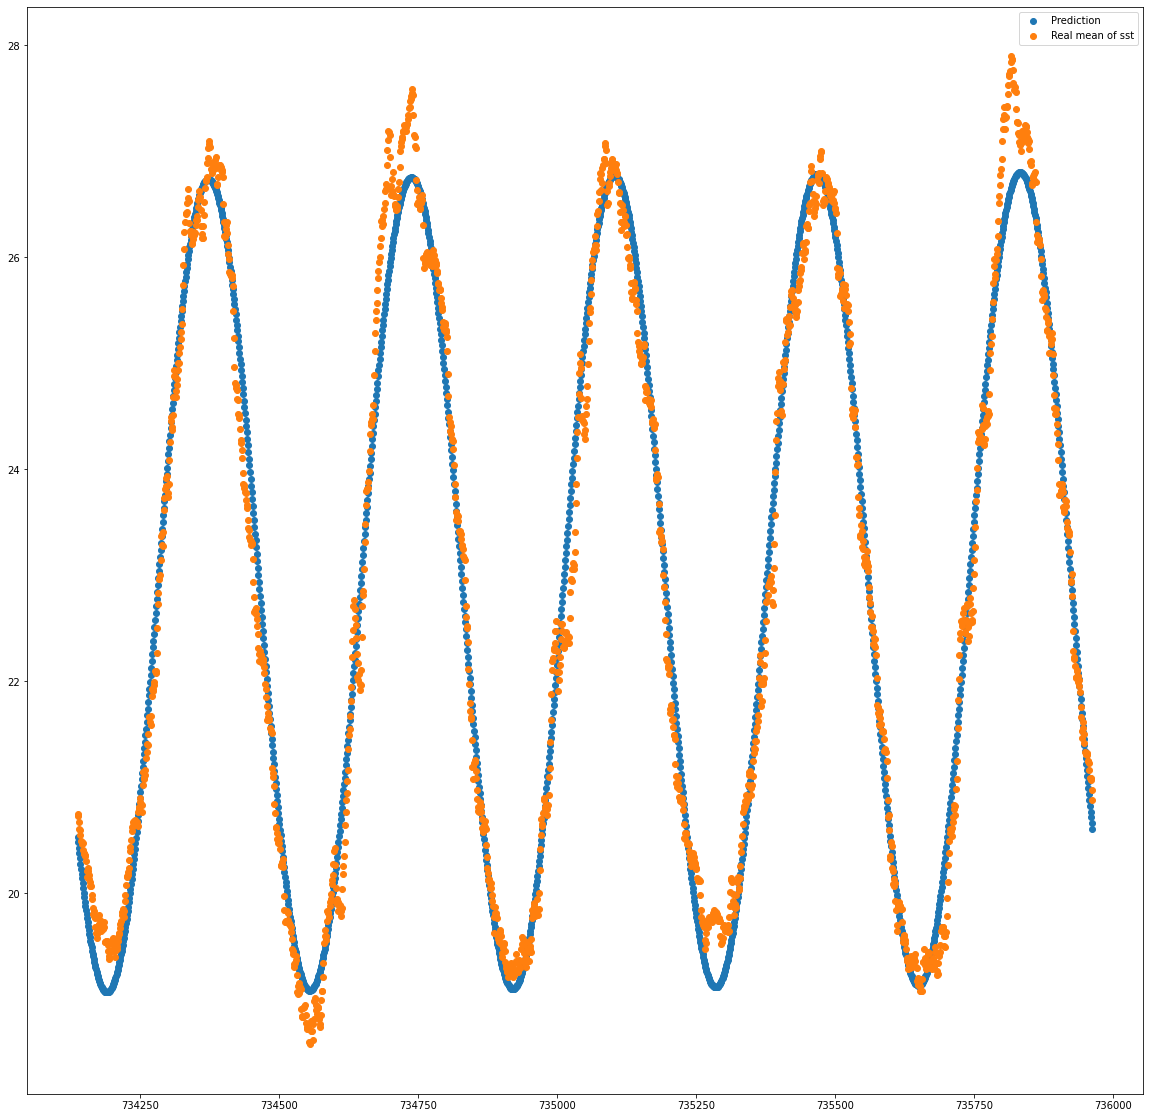

In [ ]:
plt.scatter(question4.time,reg.predict(X),label='Prediction')
plt.scatter(question4.time,question4.mean_sst,label='Real mean of sst')
plt.legend()
plt.show()

**QUESTION 5**: Compute the SSH difference between the first day in 2011 and the last day in 2015 for each location in the globe. Then, plot the map of this SSH difference: it shows the sea level rise. Finally, adjust a regression to model the tendancy of the global mean sea level rise (averaged over all the location) and plot the prediction for the horizon 2100.

In [ ]:
%%bigquery --project alert-ground-261008 question5
SELECT t1.lon, t1.lat, t2.ssh-t1.ssh as diff
FROM (SELECT * FROM bdo2020.bdo2020.2011_2015 
WHERE time = (SELECT MIN(time)FROM bdo2020.bdo2020.2011_2015 )) as t1
JOIN (SELECT * FROM bdo2020.bdo2020.2011_2015
WHERE time = (SELECT MAX(time)FROM bdo2020.bdo2020.2011_2015 ) )as t2  
ON (t1.lon= t2.lon AND  t1.lat = t2.lat)
ORDER BY t1.lon, t1.lat

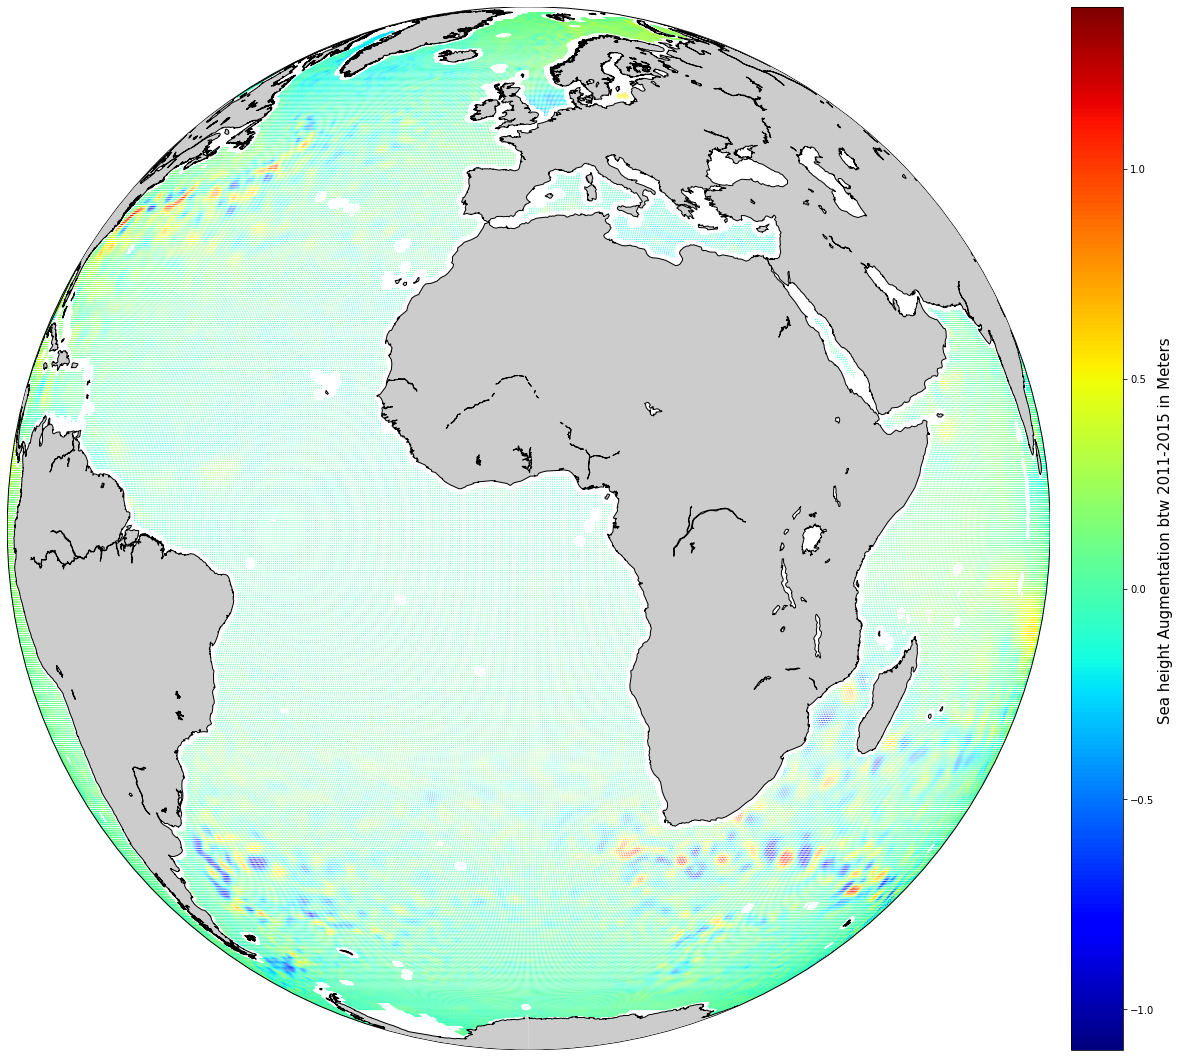

In [ ]:

plot_im(question5.lon,question5.lat,question5[question5.columns[2]],1,\
        'Sea height Augmentation btw 2011-2015 in Meters ')

In [ ]:
%%bigquery --project alert-ground-261008 question5b
SELECT time, AVG(ssh) as mean_ssh
FROM bdo2020.bdo2020.2011_2015 
GROUP BY time


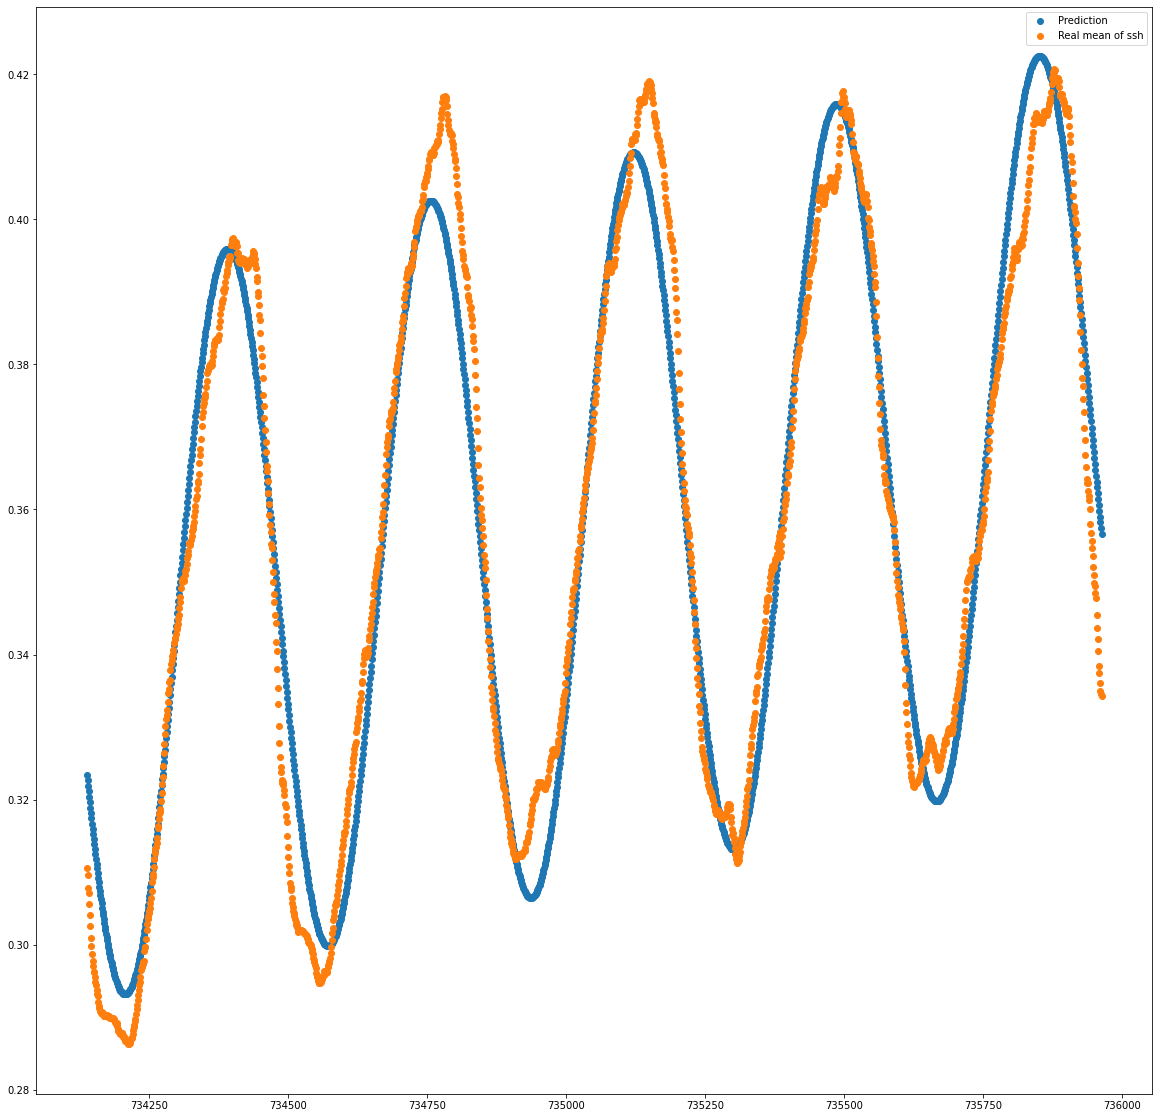

In [ ]:
X=[np.ones(len(question5b.time)),question5b.time, np.sin(2*pi*𝜔*question5b.time),np.cos(2*pi*𝜔*question5b.time)]
X=np.transpose(X)
y=question5b.mean_ssh
reg2 = LinearRegression().fit(X, y)

plt.scatter(question5b.time,reg2.predict(X),label='Prediction')
plt.scatter(question5b.time,question5b.mean_ssh,label='Real mean of ssh')
plt.legend()
plt.show()

In [ ]:

hmax=2100*365
hmin=2015*365
Δh=hmax-hmin
T=[]
for i in range(Δh):
  H=np.array([1,h+i,sin(2*pi*𝜔*(hmin+i)),cos(2*pi*𝜔*(h+i))])
  H=H.reshape(-1,1)
  T.append(reg2.predict(np.transpose(H)))

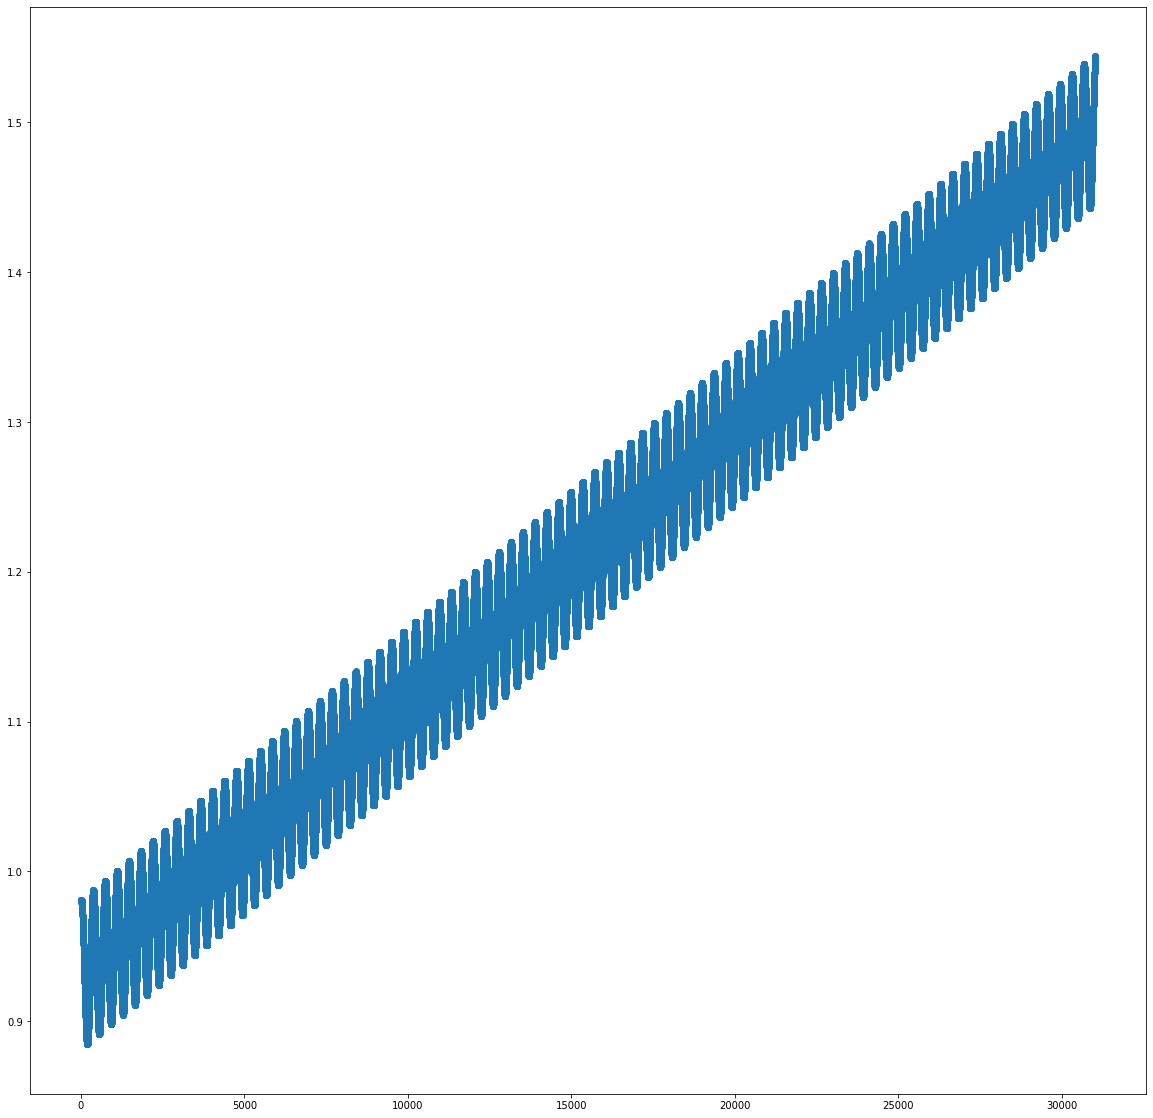

In [ ]:
plt.scatter(np.arange(0,Δh),T)